### Imports

In [11]:
import json
import pprint
import pathlib
import matplotlib.pyplot as plt
from AlpacaTrade import AlpacaTrade
from TradingAlgorithms import MeanReversion

# Get the parent directories path so we don't have to hardcode
path = pathlib.Path().cwd()

In [12]:
def save_results(to_json, file_name="results.json"):
    with open(path / file_name, "w") as out_file:
        json.dump(to_json, out_file)


In [13]:
def float_range(start=0, stop=1, step=1):
    while start < stop:
        yield float(start)
        start = round(start + step, 3)


In [14]:
diff_range = list(float_range(-20, 20, 0.5))

### Add tickers to analyze

In [15]:
# Setup the dictionary with tickers and price lists
tickers = {
    "SINT": {},
    "VISL": {},
}

In [16]:
for ticker in tickers:
    prices = AlpacaTrade.get_historical_data(ticker, limit=400, to_return={"c"})
    best_days = MeanReversion.get_best_settings(
        prices,
        num_best=-1,
        diff_range=diff_range,
        day_range=range(1, 10),
        data_splits=range(20),
    )

    tickers[ticker]["best_days"] = best_days

Plots for VISL
x = days, y = total_profit in $, colors = percent_diff


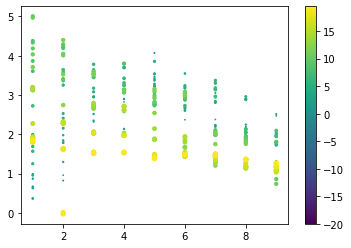

x = percent_diff, y = total_profit in $, colors = days


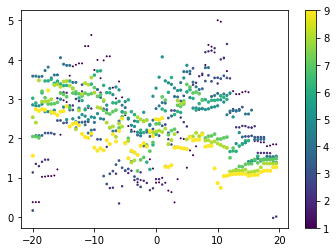

x = percent_diff, y = days, colors = total_profit in $


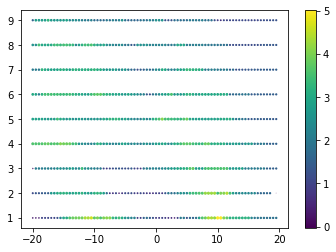

In [17]:
    days_list = [best_days[day]["mvg_avg_days"] for day in best_days]
    diff_list = [best_days[day]["percent_diff"] for day in best_days]
    profit_list = [best_days[day]["total_profit"] for day in best_days]

    print(f"Plots for {ticker}")
    print(f"x = days, y = total_profit in $, colors = percent_diff")
    plt.scatter(days_list, profit_list, s=diff_list, c=diff_list)
    plt.colorbar()
    plt.show()

    print(f"x = percent_diff, y = total_profit in $, colors = days")
    plt.scatter(diff_list, profit_list, s=days_list, c=days_list)
    plt.colorbar()
    plt.show()

    print(f"x = percent_diff, y = days, colors = total_profit in $") 
    plt.scatter(diff_list, days_list, s=profit_list, c=profit_list)
    plt.colorbar()
    plt.show()
    # plt.plot("percent_diff", "total_profit", data=best_days)

In [18]:
### Display results
# pp = pprint.PrettyPrinter(indent=2).pprint(tickers)
# print(tickers["SINT"]["best_days"])